<a href="https://colab.research.google.com/github/rlskoeser/shxco-missingdata-specreading/blob/main/missing-data/Sco_copia_missing_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# use v1.2 datasets; load from our repo for convenience
csv_urls = {
    'members': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_members_v1.2_2022-01.csv',
    'books': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_books_v1.2_2022-01.csv',
    'events': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_events_v1.2_2022-01.csv',
    # project-specific data
    'partial_borrowers': 'https://github.com/ZoeLeBlanc/unknown_borrowers/raw/main/dataset_generator/data/partial_borrowers_collapsed.csv',
    'borrow_overrides': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/data/long_borrow_overrides.csv'
}

In [ ]:
import pandas as pd

# load books
books_df = pd.read_csv(csv_urls['books'])

In [ ]:
total_books = books_df.shape[0]
total_books

6020

In [ ]:
borrowed_books = books_df[books_df.borrow_count != 0]
total_borrowed_books = borrowed_books.shape[0]
total_borrowed_books

5683

In [ ]:
uncertain_books = books_df[books_df.uncertain].shape[0]
uncertain_books

475

In [ ]:
total_borrowed_books - uncertain_books

5208

In [ ]:
books_df

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
0,https://shakespeareandco.princeton.edu/books/m...,Le Morte d'Arthur,"Malory, Thomas",NaN,NaN,NaN,NaN,NaN,1485.0,Book,False,https://archive.org/details/mortedarthur02malo,NaN,NaN,7,7,0,1930;1932;1937;1938;1939,2021-11-14T13:57:51.282365+00:00
1,https://shakespeareandco.princeton.edu/books/m...,Utopia,"More, Thomas",NaN,NaN,NaN,NaN,NaN,1516.0,Book,False,https://archive.org/details/utopiamo00more,NaN,NaN,2,2,0,1930;1950;1951,2021-10-31T17:47:49.103296+00:00
2,https://shakespeareandco.princeton.edu/books/n...,Gorboduc,"Norton, Thomas",NaN,NaN,NaN,NaN,NaN,1561.0,Book,False,NaN,NaN,NaN,1,1,0,1950,2020-06-29T03:49:47+00:00
3,https://shakespeareandco.princeton.edu/books/l...,Euphues: The Anatomy of Wit,"Lyly, John",NaN,NaN,NaN,NaN,NaN,1578.0,Book,False,https://archive.org/details/cu31924013122084,NaN,NaN,1,1,0,1941,2021-06-05T15:37:07+00:00
4,https://shakespeareandco.princeton.edu/books/s...,The Shepheard's Calendar,"Spenser, Edmund",NaN,NaN,NaN,NaN,NaN,1579.0,Book,False,https://archive.org/details/shepheardscalend00...,NaN,NaN,1,1,0,1941,2021-11-06T12:26:04.482734+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6015,https://shakespeareandco.princeton.edu/books/b...,Wuthering Heights and Agnes Grey,"Brontë, Emily;Brontë, Anne",NaN,NaN,NaN,NaN,NaN,NaN,Book,False,https://archive.org/details/wutheringheight04b...,NaN,NaN,3,3,0,1937;1938;1939,2020-06-02T21:01:35+00:00
6016,https://shakespeareandco.princeton.edu/books/c...,Yale Review,NaN,"Cross, Wilbur L.",NaN,NaN,NaN,NaN,NaN,Periodical,False,NaN,NaN,NaN,5,5,0,1936;1933;1934;1935,2020-06-11T12:07:01+00:00
6017,https://shakespeareandco.princeton.edu/books/y...,Yeats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Unidentified. By or about W. B. Yeats.,1,1,0,1920,2021-11-15T22:52:17.216749+00:00
6018,https://shakespeareandco.princeton.edu/books/y...,Yeats: Various Articles By & On,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Unidentified.,1,1,0,1939,2021-11-17T13:22:00.439805+00:00


In [ ]:
# sort by most borrowed; drop unborrowed titles
most_borrowed_books_df = borrowed_books.sort_values('borrow_count', ascending=False).reindex()
most_borrowed_books_df[['title', 'borrow_count']].head()

,title,borrow_count
5905,The New Statesman and Nation,115
5955,Time and Tide,109
5906,The New Yorker,72
1305,A Portrait of the Artist as a Young Man,56
1200,Dubliners,47


In [ ]:
most_borrowed_books_df[['title', 'borrow_count']].tail()

,title,borrow_count
1430,Ardours and Endurances,1
3859,Satan's Circus and Other Stories,1
1428,Adolphe,1
3861,Save Me the Waltz,1
6019,Zola,1


## analyze with copia


In [ ]:
!pip install copia


  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# load events to generate list of works for copia to aggregate
events_df = pd.read_csv(csv_urls['events'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# get all the borrows
borrows = events_df[events_df.event_type == 'Borrow']
borrows.shape[0]

21059

In [ ]:
borrows['item_id'] = borrows.item_uri.apply(lambda x: x.split('/')[-2])
borrows.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id
2,Borrow,1922,1922-08-23,https://shakespeareandco.princeton.edu/members...,Mr. Rhys,"Rhys, Mr.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/c...,Typhoon,NaN,"Conrad, Joseph",1902.0,NaN,Lending Library Card,"Sylvia Beach, Rhys Lending Library Card, Box 4...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/67...,conrad-typhoon
8,Borrow,1923,1923-11-07,https://shakespeareandco.princeton.edu/members...,Eyre de Lanux / Mrs. Pierre de Lanux,"de Lanux, Eyre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/w...,Night and Day,NaN,"Woolf, Virginia",1919.0,NaN,Lending Library Card,"Sylvia Beach, Eyre de Lanux Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c5...,woolf-night-day
12,Borrow,1924,1924-10-22,https://shakespeareandco.princeton.edu/members...,Simone Téry,"Téry, Simone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/j...,James Joyce,NaN,NaN,NaN,Unidentified. By or about Joyce.,Lending Library Card,"Sylvia Beach, Mlle Simone Tery Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c2...,james-joyce
13,Borrow,1924,1924-10-22,https://shakespeareandco.princeton.edu/members...,Simone Téry,"Téry, Simone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/f...,A Portrait of George Moore in a Study of His Work,NaN,"Freeman, John",1922.0,NaN,Lending Library Card,"Sylvia Beach, Mlle Simone Tery Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c2...,freeman-portrait-george-moore
22,Borrow,1926,1926-01-14,https://shakespeareandco.princeton.edu/members...,Ada (Hitchcock) MacLeish;Archibald MacLeish,"MacLeish, Ada;MacLeish, Archibald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,Tents of Israel,NaN,"Stern, G. B.",1924.0,NaN,Lending Library Card,"Sylvia Beach, Ada and Archibald MacLeish Lendi...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/22...,stern-tents-israel


In [ ]:
# how many events total?
len(borrows.item_id)

21059

In [ ]:
# how many unique items?
len(borrows.item_id.unique())

5683

In [ ]:
from copia.utils import to_abundance, basic_stats

abundance = to_abundance(borrows.item_id)
abundance

array([ 6, 16,  6, ...,  1,  1,  1])

In [ ]:
basic_stats(abundance)

{'S': 5683, 'f1': 2031, 'f2': 1099, 'f3': 673, 'f4': 468, 'n': 21059}

In [ ]:
from copia.plot import abundance_counts
abundance_counts(abundance)
abundance_counts(abundance, trendline=True);



ImportError: ignored

<Figure size 432x288 with 1 Axes>

ImportError: ignored

<Figure size 432x288 with 2 Axes>

In [ ]:
import matplotlib.pyplot as plt

# save figure not working ..
# plt.savefig('borrow_count_abundance_count.png')


In [ ]:
from copia.plot import accumulation_curve
accumulation_curve(abundance, accumulation,
                   xlabel='documents', ylabel='works',
                   title='species accumulation curve')

from copia.plot import abundance_histogram
abundance_histogram(abundance)
abundance_histogram(abundance, trendline=True)

NameError: ignored

In [ ]:
# estimate diversity
from copia.richness import *
print(diversity(abundance, method='chao1'))
print(chao1(abundance))



In [ ]:
print(jackknife(abundance, return_order=True))
print(diversity(abundance, method='jackknife', return_order=True))



In [ ]:
for m in ('chao1', 'ichao1', 'ace', 'jackknife', 'egghe_proot'):
    print(m, '->', diversity(abundance, method=m))

In [ ]:
print('species richness:', diversity(abundance, method='empirical'))
print('population size:', diversity(abundance, method='empirical', species=False))



In [ ]:
# re-estimate with confidence interval

diversity(abundance, method='chao1', CI=True, n_iter=10)

In [ ]:
diversity(abundance, method='jackknife', CI=True)

In [ ]:
print('Empirical size:', diversity(abundance, method='empirical', species=False))
print('Unbiased estimate:', diversity(abundance, method='minsample'))

In [ ]:
diversity(abundance, method='minsample', CI=True, n_iter=10)

In [ ]:
# plot diagnostics to see if it makes sense

diagn = diversity(abundance, method='minsample',
                        solver='grid', CI=False, # CI must be False for this use!
                        diagnostics=True)
print(diagn)

In [ ]:
import numpy as np
assert np.isclose(diagn['richness'],
                  diagn['n'] + (diagn['x*'] * diagn['n']),
                  atol=0.001)

In [ ]:
from copia.plot import minsample_diagnostic_plot
minsample_diagnostic_plot(abundance, diagn)

In [ ]:
# NOTE: not doing calculate species accumulation, too slow with our data

## books by unique borrowers

In [ ]:
# these numbers were based on pure borrow count; what if we look at number of borrowers instead?



In [ ]:
# get unique book/person combination
uniq_borrows = borrows[['member_uris', 'item_id']].drop_duplicates()
uniq_borrows.shape[0]

In [ ]:
uniq_borrow_book_counts = uniq_borrows.groupby('item_id').count().reset_index().rename(columns={'member_uris': 'borrower_count'}).sort_values('borrower_count', ascending=False)
uniq_borrow_book_counts

In [ ]:
len(uniq_borrows.item_id)

In [ ]:
len(uniq_borrows.item_id.unique())

In [ ]:
uniq_abundance = to_abundance(uniq_borrows.item_id)
uniq_abundance

In [ ]:
basic_stats(uniq_abundance)

In [ ]:
abundance_counts(uniq_abundance)
abundance_counts(uniq_abundance, trendline=True);

In [ ]:
abundance_histogram(uniq_abundance)
abundance_histogram(uniq_abundance, trendline=True)

In [ ]:
print(diversity(uniq_abundance, method='chao1'))
print(chao1(uniq_abundance))

In [ ]:
print(jackknife(uniq_abundance, return_order=True))
print(diversity(uniq_abundance, method='jackknife', return_order=True))



In [ ]:
for m in ('chao1', 'ichao1', 'ace', 'jackknife', 'egghe_proot'):
    print(m, '->', diversity(uniq_abundance, method=m))

In [ ]:
print('species richness:', diversity(uniq_abundance, method='empirical'))
print('population size:', diversity(uniq_abundance, method='empirical', species=False))



In [ ]:
diversity(uniq_abundance, method='minsample', CI=True, n_iter=10)

In [ ]:
uniq_diagn = diversity(uniq_abundance, method='minsample',
                        solver='grid', CI=False, # CI must be False for this use!
                        diagnostics=True)
print(uniq_diagn)

In [ ]:
assert np.isclose(uniq_diagn['richness'],
                  uniq_diagn['n'] + (uniq_diagn['x*'] * uniq_diagn['n']),
                  atol=0.001)

In [ ]:
minsample_diagnostic_plot(uniq_abundance, uniq_diagn)

## re-run copia but exclude uncertain titles

In [ ]:
# generate short-form id for matching with events and easy comparison
books_df['id'] = books_df.uri.apply(lambda x: x.split('/')[-2])
uncertain_books_df = books_df[books_df.uncertain]
uncertain_books_df[['id', 'title']]

,id,title
1154,miscellaneous-pieces,Miscellaneous Pieces
1312,epictetus,Epictetus
5300,12-30-heaven,12:30 from Heaven
5302,abc-language,ABC of Language
5303,abraham-lincoln,Abraham Lincoln
...,...,...
6011,joyce-work-progress,Work in Progress
6014,w-unclear,W[unclear]
6017,yeats,Yeats
6018,yeats-various-articles,Yeats: Various Articles By & On


In [ ]:
# exclude borrow events fro uncertain titles
certain_borrows = borrows[~borrows.item_id.isin(uncertain_books_df.id)]
certain_borrows.shape[0]

In [ ]:
certainborrow_abundance = abundance = to_abundance(certain_borrows.item_id)

In [ ]:
basic_stats(certainborrow_abundance)

In [ ]:
abundance_counts(certainborrow_abundance, trendline=True);

In [ ]:
abundance_histogram(certainborrow_abundance, trendline=True)

In [ ]:
for m in ('chao1', 'ichao1', 'ace', 'jackknife', 'egghe_proot'):
    print(m, '->', diversity(certainborrow_abundance, method=m))

In [ ]:
diversity(certainborrow_abundance, method='chao1', CI=True, n_iter=10)

In [ ]:
diversity(certainborrow_abundance, method='jackknife', CI=True)

In [ ]:
diversity(certainborrow_abundance, method='minsample', CI=True, n_iter=10)

In [ ]:
diagn = diversity(certainborrow_abundance, method='minsample',
                        solver='grid', CI=False, # CI must be False for this use!
                        diagnostics=True)
print(diagn)



In [ ]:
assert np.isclose(diagn['richness'],
                  diagn['n'] + (diagn['x*'] * diagn['n']),
                  atol=0.001)

In [ ]:
minsample_diagnostic_plot(certainborrow_abundance, diagn)

In [ ]:
# accummulation

from copia.richness import species_accumulation
accumulation = species_accumulation(certainborrow_abundance, max_steps=4000, n_iter=10)
accumulation



In [ ]:
from copia.plot import accumulation_curve
accumulation_curve(certainborrow_abundance, accumulation,
                   xlabel='documents', ylabel='works',
                   title='species accumulation curve')

In [ ]:
from copia.plot import density
estimate = diversity(certainborrow_abundance, method='iChao1', CI=True)
density(estimate);

In [ ]:
empirical = diversity(certainborrow_abundance, method='empirical')
density(estimate, empirical);

In [ ]:
from copia.utils import survival_ratio
survival = survival_ratio(abundance, method='chao1')
density(survival, xlim=(0, 1));

In [ ]:
from copia.hill import hill_numbers
emp, est = hill_numbers(abundance, n_iter=10)
print(est)


In [ ]:
import copia.plot as plot
plot.hill_plot(emp, est);

### re-run uniq borrowers, no uncertain titles


In [ ]:
# get unique book/person combination
uniq_certain_borrows = certain_borrows[['member_uris', 'item_id']].drop_duplicates()
uniq_certain_borrows.shape[0]

In [ ]:
uniq_certain_abundance = to_abundance(uniq_certain_borrows.item_id)

In [ ]:
basic_stats(uniq_certain_abundance)

In [ ]:
abundance_counts(uniq_certain_abundance, trendline=True);

In [ ]:
abundance_histogram(uniq_certain_abundance, trendline=True)

In [ ]:
for m in ('chao1', 'ichao1', 'ace', 'jackknife', 'egghe_proot'):
    print(m, '->', diversity(uniq_certain_abundance, method=m))

In [ ]:
diversity(uniq_certain_abundance, method='chao1', CI=True, n_iter=10)

In [ ]:
diversity(uniq_certain_abundance, method='jackknife', CI=True)

In [ ]:
diversity(uniq_certain_abundance, method='minsample', CI=True, n_iter=10)

In [ ]:
diagn = diversity(uniq_certain_abundance, method='minsample',
                        solver='grid', CI=False, # CI must be False for this use!
                        diagnostics=True)
print(diagn)



In [ ]:
assert np.isclose(diagn['richness'],
                  diagn['n'] + (diagn['x*'] * diagn['n']),
                  atol=0.001)

In [ ]:
minsample_diagnostic_plot(uniq_certain_abundance, diagn)

### percent available


In [ ]:
certain_titles = 5269

In [ ]:
# all borrow events for certain titles

chao1 = 6768
chao1_upper = 6943
chao1_lower = 6628

In [ ]:
print(f'''
total estimate: {chao1} (upper {chao1_upper}; lower {chao1_lower})
missing titles {chao1 - certain_titles} (upper {chao1_upper - certain_titles}; lower {chao1_lower - certain_titles})
percent surviving: {certain_titles/chao1 * 100:.2f}% (upper {certain_titles/chao1_upper * 100:.2f}%; lower {certain_titles/chao1_lower * 100:.2f}%)
''')

In [ ]:
jackknife = 8102
jackknife_upper = 8432
jackknife_lower = 7771

In [ ]:
print(f'''
percent surviving: {certain_titles/jackknife * 100:.2f}% (upper {certain_titles/jackknife_upper * 100:.2f}%; lower {certain_titles/jackknife_lower * 100:.2f}%)
''')

In [ ]:
# minsample
minsample_borrows = 201949
actual_borrows = 20316
actual_borrows / minsample_borrows


hmm, but we know we have more than 10% of borrowing activity


In [ ]:
# unique borrowers for certain titles
chao1 = 6873
chao1_upper = 6950
chao1_lower = 6775

In [ ]:
print(f'''
total estimate: {chao1} (upper {chao1_upper}; lower {chao1_lower})
percent surviving: {certain_titles/chao1 * 100:.2f}% (upper {certain_titles/chao1_upper * 100:.2f}%; lower {certain_titles/chao1_lower * 100:.2f}%)
''')

In [ ]:
jackknife = 8567
jackknife_upper = 9128
jackknife_lower = 8005

In [ ]:
print(f'''
percent surviving: {certain_titles/jackknife * 100:.2f}% (upper {certain_titles/jackknife_upper * 100:.2f}%; lower {certain_titles/jackknife_lower * 100:.2f}%)
''')

In [ ]:
uniq_borrow_minsample = 189648
actual_borrows / uniq_borrow_minsample

In [ ]:
# how many books were checked out only once?
books_df[books_df.borrow_count == 1][['id', 'title', 'uncertain', 'borrow_count']]

In [ ]:
books_df[books_df.borrow_count == 1][~books_df.uncertain][['id', 'title', 'uncertain', 'borrow_count']]

## beach's tally

> Based on a handwritten tally in the Beach papers, we know that there were 4,600 books in February 1931. 

In [ ]:
from datetime import date

# parse start date so we can compare
borrows['start_date_dt'] = pd.to_datetime(borrows['start_date'], errors='coerce')

# get all borrows up to february 28 1931
pretally_borrows = borrows[borrows.start_date_dt <= pd.to_datetime(date(1931, 2, 28))]

# how many unique books?
len(pretally_borrows.item_id.unique())

In [ ]:
pretally_borrows.borrow_status.value_counts()

In [ ]:
# what about only the books that were returned?
len(pretally_borrows[pretally_borrows.borrow_status == 'Returned'].item_id.unique())

In [ ]:
# oh, but how do we group books so we get the *last* status?
# a book could have been returned multiple times before it is lost or bought

sorted_pretally_borrows = pretally_borrows.sort_values('start_date_dt', ascending=True)
sorted_pretally_borrows[['start_date', 'item_id', 'borrow_status']]


In [ ]:
# drop duplicates based only on item id; keep the last entry
pretally_borrow_laststatus = sorted_pretally_borrows.drop_duplicates(subset=['item_id'], keep='last')
pretally_borrow_laststatus[['start_date', 'item_id', 'borrow_status']]

In [ ]:
pretally_borrow_laststatus.borrow_status.value_counts()

In [ ]:
pretally_borrow_laststatus[pretally_borrow_laststatus.borrow_status == 'Returned'][['start_date', 'item_id', 'borrow_status']]

In [ ]:
# double check
len(pretally_borrow_laststatus[pretally_borrow_laststatus.borrow_status == 'Returned'].item_id.unique())

In [ ]:
2765 / 4600

## run copia on the later time period

In [ ]:
certain_borrows = borrows[~borrows.item_id.isin(uncertain_books_df.id)]
certain_borrows

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id
2,Borrow,1922,1922-08-23,https://shakespeareandco.princeton.edu/members...,Mr. Rhys,"Rhys, Mr.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/c...,Typhoon,NaN,"Conrad, Joseph",1902.0,NaN,Lending Library Card,"Sylvia Beach, Rhys Lending Library Card, Box 4...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/67...,conrad-typhoon
8,Borrow,1923,1923-11-07,https://shakespeareandco.princeton.edu/members...,Eyre de Lanux / Mrs. Pierre de Lanux,"de Lanux, Eyre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/w...,Night and Day,NaN,"Woolf, Virginia",1919.0,NaN,Lending Library Card,"Sylvia Beach, Eyre de Lanux Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c5...,woolf-night-day
13,Borrow,1924,1924-10-22,https://shakespeareandco.princeton.edu/members...,Simone Téry,"Téry, Simone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/f...,A Portrait of George Moore in a Study of His Work,NaN,"Freeman, John",1922.0,NaN,Lending Library Card,"Sylvia Beach, Mlle Simone Tery Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c2...,freeman-portrait-george-moore
22,Borrow,1926,1926-01-14,https://shakespeareandco.princeton.edu/members...,Ada (Hitchcock) MacLeish;Archibald MacLeish,"MacLeish, Ada;MacLeish, Archibald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,Tents of Israel,NaN,"Stern, G. B.",1924.0,NaN,Lending Library Card,"Sylvia Beach, Ada and Archibald MacLeish Lendi...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/22...,stern-tents-israel
38,Borrow,1929,1929-03-13,https://shakespeareandco.princeton.edu/members...,Elvira de Alvear,"de Alvear, Elvira",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/y...,Later Poems,NaN,"Yeats, William Butler",1922.0,NaN,Lending Library Card,"Sylvia Beach, Elvira de Alvear Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/1b...,yeats-later-poems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35429,Borrow,NaN,NaN,https://shakespeareandco.princeton.edu/members...,James Joyce,"Joyce, James",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,The Expedition of Humphry Clinker,NaN,"Smollett, Tobias",1771.0,NaN,Lending Library Card,James Joyce's lending library cards not repres...,NaN,NaN,smollett-expedition-humphry-clinker
35457,Borrow,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Bernard Hommel,"Hommel, Bernard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/h...,Poems,NaN,"Heine, Heinrich",NaN,NaN,Lending Library Card,"Sylvia Beach, Bernard Hommel Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/e4...,heine-poems
35460,Borrow,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Bernard Hommel,"Hommel, Bernard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/c...,Exile's Return: A Narrative of Ideas,NaN,"Cowley, Malcolm",1934.0,NaN,Le

In [ ]:
def get_best_date(row):
  # dates are strings; return the longest
  start_date_len = len(row.start_date) if pd.notna(row.start_date) else 0
  end_date_len = len(row.end_date) if pd.notna(row.end_date) else 0

  if start_date_len > end_date_len:
    return row.start_date
  else:
    return row.end_date

# get either start or end date, whichever we find first

certain_borrows['date'] = certain_borrows.apply(get_best_date, axis=1)
certain_borrows[['start_date', 'end_date', 'date']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,start_date,end_date,date
2,1922,1922-08-23,1922-08-23
8,1923,1923-11-07,1923-11-07
13,1924,1924-10-22,1924-10-22
22,1926,1926-01-14,1926-01-14
38,1929,1929-03-13,1929-03-13


In [ ]:
certain_borrows['date_dt'] = pd.to_datetime(certain_borrows.date, errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# catalog borrows ? or post 1933 ?
# February 17 1931 to September 25 1932 (586 days)
# let's just do after this gap

from datetime import date

range_start = pd.to_datetime(date(1932, 9, 26))

later_borrows = certain_borrows[certain_borrows.date_dt >= range_start]
later_borrows



,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id,date,date_dt
121,Borrow,1934,1934-11-16,https://shakespeareandco.princeton.edu/members...,Catherine Marie Knight Peake / Mrs. Charles Pe...,"Peake, Catherine;Peake, Charles",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/b...,James Joyce and the Making of Ulysses,NaN,"Budgen, Frank",1934.0,NaN,Lending Library Card,"Sylvia Beach, Charles Peake Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/0c...,budgen-james-joyce-making,1934-11-16,1934-11-16
140,Borrow,1936,1936-12-04,https://shakespeareandco.princeton.edu/members...,Suzanne Mespoulet,"Mespoulet, Suzanne",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/d...,"Restoration Comedy, 1660 – 1720",NaN,"Dobrée, Bonamy",1924.0,NaN,Lending Library Card,"Sylvia Beach, Suzanne Mespoulet Lending Librar...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/67...,dobree-restoration-comedy-1660,1936-12-04,1936-12-04
149,Borrow,1937,1937-06-01,https://shakespeareandco.princeton.edu/members...,Fernand Colens,"Colens, Fernand",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/d...,The Friendly Tree,NaN,"Day Lewis, C.",1936.0,NaN,Lending Library Card,"Sylvia Beach, Fernand Colens Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/6d%2F7...,day-lewis-friendly-tree,1937-06-01,1937-06-01
150,Borrow,1937,1937-12-08,https://shakespeareandco.princeton.edu/members...,Fanny Rirachowsky,"Rirachowsky, Fanny",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,Poems,NaN,"Spender, Stephen",1933.0,NaN,Lending Library Card,"Sylvia Beach, Fanny Rirachowsky Lending Librar...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/b8%2F1...,spender-poems,1937-12-08,1937-12-08
152,Borrow,1937,1937-12-08,https://shakespeareandco.princeton.edu/members...,Fanny Rirachowsky,"Rirachowsky, Fanny",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/t...,The Home and the World,NaN,"Tagore, Rabindranath",1919.0,NaN,Lending Library Card,"Sylvia Beach, Fanny Rirachowsky Lending Librar...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/b8%2F1...,tagore-home-world,1937-12-08,1937-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29908,Borrow,1961-10-04,1962-03-21,https://shakespeareandco.princeton.edu/members...,Ann Samyn,"Samyn, Ann",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,168.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/m...,North America: Continent of Conjecture,NaN,"McAlmon, Robert",1929.0,NaN,Lending Library Card,"Sylvia Beach, Mademoiselle Anne Samyn Lending ...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/9a...,mcalmon-north-america-continent,1962-03-21,1962-03-21
29909,Borrow,1961-12-14,NaN,https://shakespeareandco.princeton.edu/members...,Hélène (Focillon) Baltrusaitis,"Baltrusaitis, Hélène",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,Saturday Night and Sunday Morning,NaN,"Sillitoe, Alan",1958.0,NaN,Lending Library Card,"Sylvia Beach, Madame Helene Baltrusaitis Lendi...",https://figgy.pri

In [ ]:
later_abundance = to_abundance(later_borrows.item_id)

In [ ]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
copia 0.1.4 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


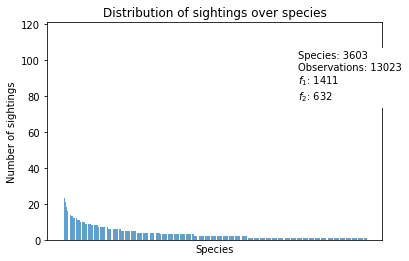

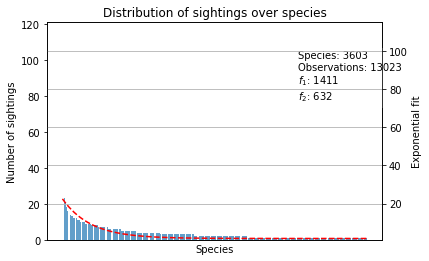

In [ ]:
abundance_counts(later_abundance)
abundance_counts(later_abundance, trendline=True);

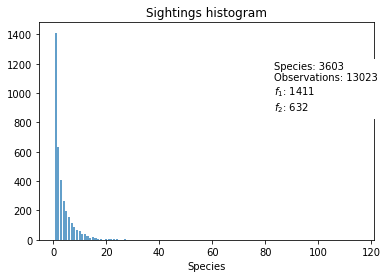

In [ ]:
from copia.plot import abundance_histogram
abundance_histogram(later_abundance)

In [ ]:
from copia.richness import *

for m in ('chao1', 'ichao1', 'ace', 'jackknife', 'egghe_proot', 'minsample'):
    print(m, '->', diversity(later_abundance, method=m))

chao1 -> 5177.974780621821
ichao1 -> 5533.397781689817
ace -> 4877.040161073133
jackknife -> 7281.000000000002
egghe_proot -> 6075.0994294919265
minsample -> 165483.41346041346


/usr/local/lib/python3.7/dist-packages/copia/richness.py:450: UserWarning: Tolerance criterion not met: 0.12160141724598361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


In [ ]:
print('species richness:', diversity(later_abundance, method='empirical'))
print('population size:', diversity(later_abundance, method='empirical', species=False))

species richness: 3603
population size: 13023


In [ ]:
print('Empirical size:', diversity(later_abundance, method='empirical', species=False))
print('Unbiased estimate:', diversity(later_abundance, method='minsample'))

Empirical size: 13023
Unbiased estimate: 165483.41346041346


/usr/local/lib/python3.7/dist-packages/copia/richness.py:450: UserWarning: Tolerance criterion not met: 0.12160141724598361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


In [ ]:
print(diversity(later_abundance, method='minsample', solver='fsolve'))
print(diversity(later_abundance, method='minsample', solver='grid'))

Diff_intersect: inf
165483.41346041346
165483.41346041346


/usr/local/lib/python3.7/dist-packages/copia/richness.py:424: RuntimeWarning: overflow encountered in exp
  v = lambda x: np.exp(x * (2 * f2 / f1))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/copia/richness.py:437: UserWarning: Tolerance criterion not met via fsolve: inf > 0.1-> backing off to grid-solver.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/copia/richness.py:450: UserWarning: Tolerance criterion not met: 0.12160141724598361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


In [ ]:
diagn = diversity(later_abundance, method='minsample',
                        solver='grid', CI=False, # CI must be False for this use!
                        diagnostics=True)
print(diagn)

{'richness': 165483.41346041346, 'x*': 11.707011707011707, 'n': 13023}


/usr/local/lib/python3.7/dist-packages/copia/richness.py:450: UserWarning: Tolerance criterion not met: 0.12160141724598361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


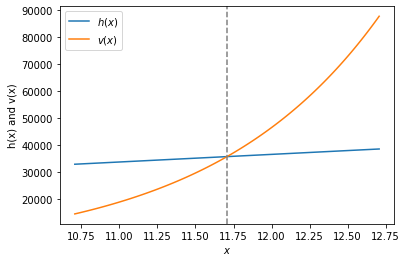

In [ ]:
from copia.plot import minsample_diagnostic_plot
minsample_diagnostic_plot(later_abundance, diagn)


In [ ]:
from copia.richness import species_accumulation
accumulation = species_accumulation(later_abundance, max_steps=4000, n_iter=10)
accumulation



  0%|          | 0/10 [00:00<?, ?it/s]Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.7/dist-packages/copia/stats.py", line 168, in rarefaction_extrapolation
    return np.array([_sub(mi) for mi in range(1, max_steps)])
  File "/usr/local/lib/python3.7/dist-packages/copia/stats.py", line 168, in <listcomp>
    return np.array([_sub(mi) for mi in range(1, max_steps)])
  File "/usr/local/lib/python3.7/dist-packages/copia/stats.py", line 161, in _sub
    0 for i in x]))
  File "/usr/local/lib/python3.7/dist-packages/copia/stats.py", line 161, in <listcomp>
    0 for i in x]))


KeyboardInterrupt: ignored

KeyboardInterrupt



100%|██████████| 1000/1000 [00:01<00:00, 556.14it/s]


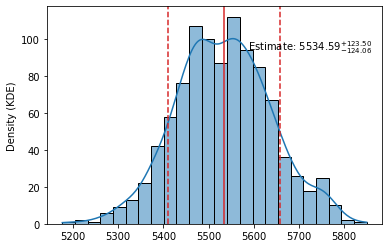

In [ ]:
from copia.plot import density
estimate = diversity(later_abundance, method='iChao1', CI=True)
density(estimate);

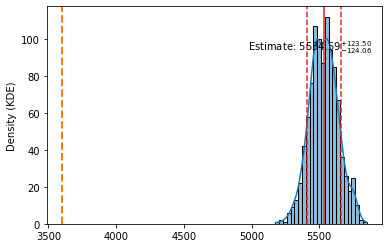

In [ ]:
empirical = diversity(later_abundance, method='empirical')
density(estimate, empirical);

In [ ]:
from copia.hill import hill_numbers
emp, est = hill_numbers(later_abundance, n_iter=10)


100%|██████████| 10/10 [00:00<00:00, 35.86it/s]

100%|██████████| 10/10 [00:59<00:00,  5.92s/it]


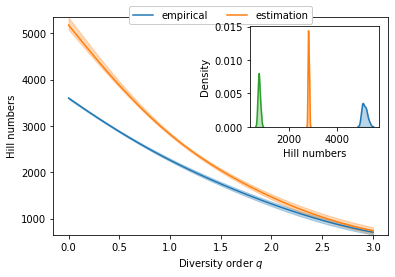

In [ ]:
import copia.plot as plot
plot.hill_plot(emp, est);

In [ ]:
# what percent do these numbers give us for this time period?

later_period_items = len(later_borrows.item_id.unique())
later_period_items




3603

In [ ]:
estimates = {
'chao1':  5177.974780621821,
'ichao1': 5533.397781689817,
'ace': 4877.040161073133,
'jackknife': 7281.000000000002,
'egghe_proot': 6075.0994294919265,
}

for algo, est in estimates.items():
  print('%s : %.2f%%' % (algo, later_period_items / est * 100))


chao1 : 69.58%
ichao1 : 65.11%
ace : 73.88%
jackknife : 49.48%
egghe_proot : 59.31%
